<a href="https://colab.research.google.com/github/Baibubuu23/Unsup/blob/main/%E0%B8%9B%E0%B8%B1%E0%B8%88%E0%B8%88%E0%B8%B1%E0%B8%A2_3_%E0%B8%A3%E0%B8%AD%E0%B8%9A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
# STEP 1: โหลดไฟล์
df = pd.read_excel("ปัจจัย 3 รอบ.xlsx")

In [3]:
print(df.columns.tolist())


['ID', 'ฉันมองหาสินค้าราคาถูกที่สุดเสมอ รอบที่1', 'ฉันมองหาสินค้าราคาถูกที่สุดเสมอ รอบที่2', 'ฉันมองหาสินค้าราคาถูกที่สุดเสมอ รอบที่3', 'ฉันให้ความสำคัญกับความคุ้มค่า คุ้มราคามากที่สุด (คุณภาพเหมาะสมกับราคา) รอบที่1', 'ฉันให้ความสำคัญกับความคุ้มค่า คุ้มราคามากที่สุด (คุณภาพเหมาะสมกับราคา) รอบที่2', 'ฉันให้ความสำคัญกับความคุ้มค่า คุ้มราคามากที่สุด (คุณภาพเหมาะสมกับราคา) รอบที่3', 'ฉันมักจะรอซื้อสินค้าเฉพาะช่วงโปรโมชั่น ลด แลก แจก แถม รอบที่1', 'ฉันมักจะรอซื้อสินค้าเฉพาะช่วงโปรโมชั่น ลด แลก แจก แถม รอบที่2', 'ฉันมักจะรอซื้อสินค้าเฉพาะช่วงโปรโมชั่น ลด แลก แจก แถม รอบที่3', 'ฉันเปรียบเทียบราคาสินค้าจากหลายๆที่ ก่อนตัดสินใจซื้อเสมอ รอบที่1', 'ฉันเปรียบเทียบราคาสินค้าจากหลายๆที่ ก่อนตัดสินใจซื้อเสมอ รอบที่2', 'ฉันเปรียบเทียบราคาสินค้าจากหลายๆที่ ก่อนตัดสินใจซื้อเสมอ รอบที่3', 'คุณภาพและความสดใหม่ของสินค้า คือสิ่งที่สำคัญที่สุดสำหรับฉัน รอบที่1', 'คุณภาพและความสดใหม่ของสินค้า คือสิ่งที่สำคัญที่สุดสำหรับฉัน รอบที่2', 'คุณภาพและความสดใหม่ของสินค้า คือสิ่งที่สำคัญที่สุดสำหรับฉัน รอบที่3', 'ฉันยอ

In [4]:
df.columns = df.columns.str.strip()
#df.columns

In [5]:
X = df.drop(columns=['ID'])
X_scaled = X

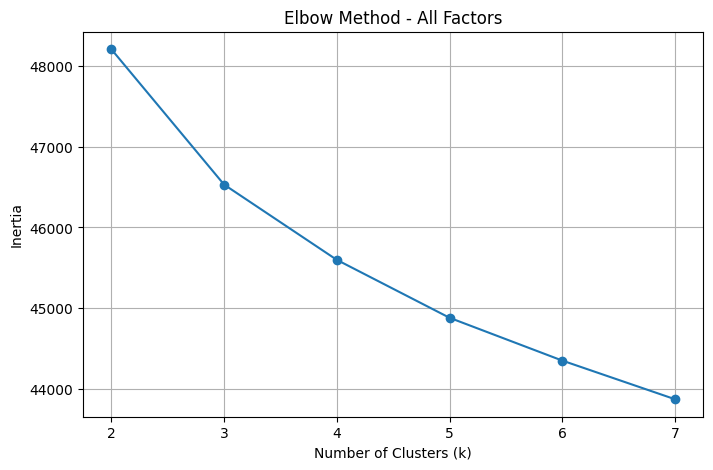

In [6]:
inertias = []
K_range = range(2, 8)  # ลอง k ตั้งแต่ 2 ถึง 7
for k in K_range:
    model = KMeans(n_clusters=k, random_state=42, n_init=10)
    model.fit(X_scaled)
    inertias.append(model.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K_range, inertias, marker='o', linestyle='-')
plt.title("Elbow Method - All Factors")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.grid(True)
plt.xticks(K_range)
plt.show()

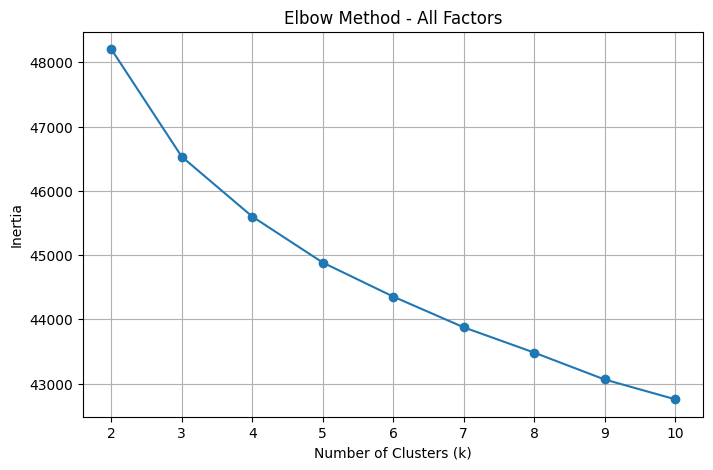

In [7]:
inertias = []
K_range = range(2, 11)  # ลอง k ตั้งแต่ 2 ถึง 10
for k in K_range:
    model = KMeans(n_clusters=k, random_state=42, n_init=10)
    model.fit(X_scaled)
    inertias.append(model.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K_range, inertias, marker='o', linestyle='-')
plt.title("Elbow Method - All Factors")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.grid(True)
plt.xticks(K_range)
plt.show()

In [12]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

In [13]:
print(df[['ID', 'Cluster']].head())


   ID  Cluster
0  13        0
1  22        1
2  24        0
3  25        2
4  26        2


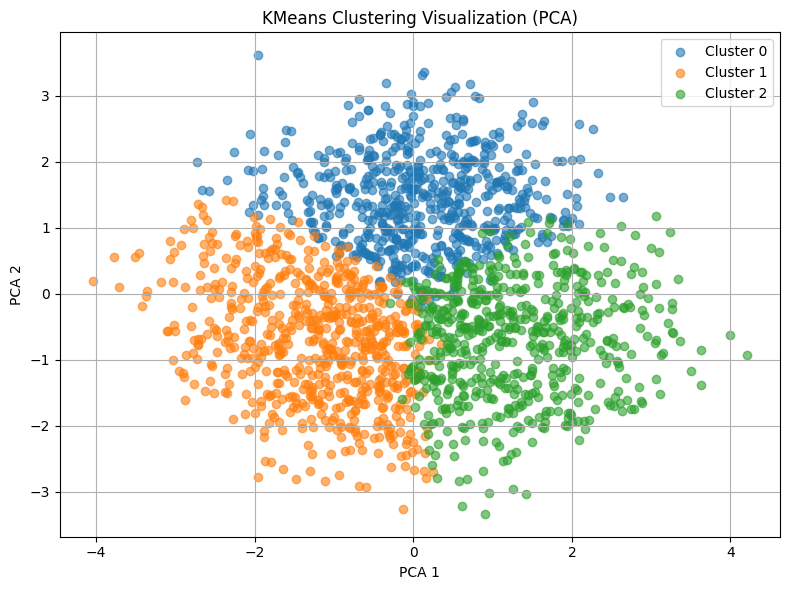

In [14]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df_plot = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
df_plot['Cluster'] = df['Cluster']

plt.figure(figsize=(8, 6))
for cluster_num in sorted(df_plot['Cluster'].unique()):
    subset = df_plot[df_plot['Cluster'] == cluster_num]
    plt.scatter(subset['PCA1'], subset['PCA2'], label=f'Cluster {cluster_num}', alpha=0.6)

plt.title("KMeans Clustering Visualization (PCA)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
